# Import libraries

In [1]:
from PIL import Image  # Python Imaging Library
import numpy as np

In [2]:
inicjaly = Image.open("an.bmp")  # wczytywanie obrazu

print("tryb", inicjaly.mode)
print("format", inicjaly.format)
print("rozmiar", inicjaly.size)

t_inicjaly = np.asarray(inicjaly)
print("typ danych tablicy", t_inicjaly.dtype)  # typ danych przechowywanych w tablicy
print("rozmiar tablicy", t_inicjaly.shape)  # rozmiar tablicy - warto porównac z wymiarami obrazka


tryb 1
format BMP
rozmiar (100, 50)
typ danych tablicy bool
rozmiar tablicy (50, 100)


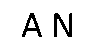

In [3]:
inicjaly

# 1.Napisz funkcję rysuj_ramke_w_obrazie(obraz, grub)
## 1.1 której argumentami są  
* i. obraz  # obraz jest w trybie ‘ 1 ’ 
* ii. grubość ramki grub 

## 1.2 która działa następująco: 
* i. wczytuje tablicę obrazu obraz  w typie danych uint8 
* ii. zmienia wartości elementów w ramce na brzegu obrazu tak, żeby powstała czarna ramka grubości grub 
* iii. zamienia typ tablicy na bool i tworzy nowy obraz czarno-biały. 

## 1.3 Wskazówka: wykorzystaj funkcję rysuj_paski_w_obrazie(obraz, grub)  

In [4]:
def rysuj_ramke_w_obrazie(tab_obraz: np.uint8, grub: int):   
    h, w = tab_obraz.shape
    
    for i in range(h):
        for j in range(grub):
            tab_obraz[i][j]=0 
        for j in range(w-grub,w):
            tab_obraz[i][j]=0 
            
    for i in range(w):
        for j in range(grub):
            tab_obraz[j][i] = 0  
        for j in range(h-grub, h): 
            tab_obraz[j][i] = 0  
    
    tab = tab_obraz.astype(bool) 
    return Image.fromarray(tab)

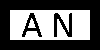

In [5]:
tab_obraz = np.asarray(inicjaly).astype(np.uint8)
rysuj_ramke_w_obrazie(tab_obraz=tab_obraz, grub=10)

# 2. Napisz funkcje (dla każdego podpunktu oddzielnie), które dla podanych 𝑤 ,ℎ tworzą obrazy o wymiarach w×h, następująco: 

## 1.1 rysuj_ramki(w,h,grub)  - obraz na wyjściu ma na przemian czarną i białą ramkę grubości 𝑔𝑟𝑢𝑏  licząc od zewnętrznych krawędzi obrazu 

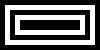

In [6]:
def rysuj_ramki(w: int, h: int, grub: int):
    table = np.ones((h, w), dtype=np.uint8) * 255 

    liczba_ramek = min(h, w) // (2 * grub)  

    for index in range(liczba_ramek):
        kolor_wartosci = 0 if (index % 2)  == 0 else 255 

        # Górna ramka
        table[index * grub : (index + 1) *grub ,
              index*grub:w-index*grub] = kolor_wartosci
        
        #Dolna ramka
        table[h - (index + 1) * grub : h - (index * grub),
              index * grub : w - index * grub] = kolor_wartosci

        #Lewa ramka
        table[index * grub : h - (index * grub), 
              index * grub : (index + 1) * grub] = kolor_wartosci
        
        #Prawa ramka
        table[index * grub : h - (index * grub), 
              w - (index + 1) * grub : w - (index * grub)] = kolor_wartosci

    return Image.fromarray(table)

w = 100
h = 50
grub = 5
rysuj_ramki(w,h,grub)

## 1.2 rysuj_pasy_pionowe(w,h,grub) -  obraz na wyjściu ma pionowe pasy grubości 𝑔𝑟𝑢𝑏  zaczynając od czarnego od lewej 

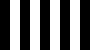

In [7]:
def rysuj_pasy_pionowe(w: int,h: int,grub: int):
    table = np.ones((h,w), dtype = np.uint8) * 255
    
    for index in range(0, w, grub * 2):
        
        table[: , index : index + grub ] = 0
    
    return Image.fromarray(table)

w = 100
h = 50
grub = 10
rysuj_pasy_pionowe(w, h, grub)

## 1.3 rysuj_wlasne(w,h, ?)  -  spełnia wymagania własne autora (wymagania trzeba wcześniej opisać)

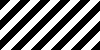

In [8]:
def rysuj_pasy_diagonalne(w: int, h: int, grub: int):
    table = np.ones((h, w), dtype=np.uint8) * 255 
    
    for index in range(0, w + h, grub * 2):
        for y in range(h):
            
            start = max(0, index - y)
            end = min(w, index - y + grub)
            
            if start < end :
                table[y, start : end] = 0  
    
    return Image.fromarray(table)

w = 100
h = 50
grub = 10
rysuj_pasy_diagonalne(w, h, grub)

# 3. Modyfikując funkcję wstaw_obraz(w, h, m, n, obraz) napisz funkcję wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n) , która w miejscu m, n obrazu_bazowego wstawia  obraz_wstawiany (wraz z tłem) 

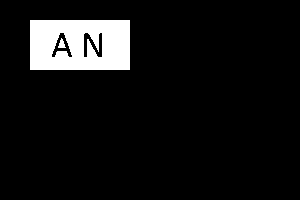

In [9]:
def wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n):
    tab_obraz = np.asarray(obraz_wstawiany) * 1  
    h0, w0 = tab_obraz.shape 

    tab = np.asarray(obraz_bazowy) * 1 
    h1, w1 = tab.shape  
    
    n_k = min(h1, n + h0)  
    m_k = min(w1, m + w0)  
    
    n_p = max(0, n)
    m_p = max(0, m) 
    
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            tab[i, j] = tab_obraz[i - n, j - m]
    
    tab = tab.astype(bool)  
    return Image.fromarray(tab)  

obraz_bazowy = Image.new('L', (300, 200), 0)  
obraz_wstawiany = inicjaly  
m = 30  
n = 20  

wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n)